<a href="https://colab.research.google.com/github/guiilherm/Estudos/blob/main/PyCaret_Regression_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret;

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [3]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [4]:
#check the shape of data
dataset.shape

(6000, 8)

In [5]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True,inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data For Predictions: (600, 8)


Setting Up

In [7]:
from pycaret.regression import *
exp_reg101 = setup(data=data, target='Price', session_id=123)

,Description,Value
0,session_id,123
1,Target,Price
2,Original Data,"(5400, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3779, 28)"


Comparing All Models

In [8]:
best = compare_models(exclude = ['ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,762.0118,2.763999e+06,1612.2410,0.9729,0.0817,0.0607,1.317
rf,Random Forest Regressor,760.6304,2.929683e+06,1663.0148,0.9714,0.0818,0.0597,1.229
lightgbm,Light Gradient Boosting Machine,752.6446,3.056348e+06,1687.9907,0.9711,0.0773,0.0567,0.131
gbr,Gradient Boosting Regressor,920.0795,3.763129e+06,1900.8431,0.9633,0.1024,0.0770,0.287
dt,Decision Tree Regressor,1003.1237,5.305620e+06,2228.7271,0.9476,0.1083,0.0775,0.031
ridge,Ridge Regression,2413.5704,1.412049e+07,3726.1643,0.8621,0.6689,0.2875,0.016
lasso,Lasso Regression,2412.1923,1.424680e+07,3744.2305,0.8608,0.6767,0.2866,0.036
llar,Lasso Least Angle Regression,2355.6152,1.427202e+07,3745.3095,0.8607,0.6391,0.2728,0.019
br,Bayesian Ridge,2415.8031,1.427077e+07,3746.9951,0.8606,0.6696,0.2873,0.021
lr,Linear Regression,2418.7037,1.427937e+07,3748.9580,0.8604,0.6690,0.2879,0.310


In [9]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


AdaBoost Regressor

In [10]:
ada = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4101.8809,2.301383e+07,4797.2732,0.7473,0.4758,0.5470
1,4251.5693,2.929675e+07,5412.6474,0.7755,0.4940,0.5702
2,4047.8474,2.229166e+07,4721.4045,0.7955,0.5068,0.5871
3,4298.3867,2.348278e+07,4845.9038,0.7409,0.5089,0.5960
4,3888.5584,2.446181e+07,4945.8880,0.6949,0.4764,0.5461
5,4566.4889,2.973391e+07,5452.8813,0.7462,0.5462,0.6598
6,4628.7271,2.784109e+07,5276.4659,0.7384,0.5549,0.6676
7,4316.4317,2.597975e+07,5097.0336,0.6715,0.5034,0.5858
8,3931.2163,2.109707e+07,4593.1549,0.7928,0.4858,0.5513
9,4291.1097,2.481557e+07,4981.5225,0.7637,0.5495,0.6592


In [11]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


Light Gradient Boosting Machine

In [12]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,625.1813,1.051763e+06,1025.5550,0.9885,0.0715,0.0526
1,797.6185,5.638866e+06,2374.6297,0.9568,0.0727,0.0537
2,829.4586,3.328375e+06,1824.3836,0.9695,0.0860,0.0619
3,720.3923,1.697211e+06,1302.7707,0.9813,0.0714,0.0554
4,645.6800,1.799949e+06,1341.6218,0.9775,0.0745,0.0534
5,830.7176,6.423604e+06,2534.4830,0.9452,0.0810,0.0567
6,799.9136,3.353992e+06,1831.3908,0.9685,0.0793,0.0585
7,714.3607,1.930223e+06,1389.3245,0.9756,0.0732,0.0556
8,784.7648,2.211933e+06,1487.2569,0.9783,0.0766,0.0582
9,778.3590,3.127561e+06,1768.4913,0.9702,0.0872,0.0609


Decision Tree

In [13]:
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,859.1907,2.456840e+06,1567.4310,0.9730,0.1016,0.0727
1,1122.9409,9.852564e+06,3138.8795,0.9245,0.1102,0.0758
2,911.3452,2.803663e+06,1674.4141,0.9743,0.0988,0.0729
3,1002.5575,3.926739e+06,1981.6002,0.9567,0.1049,0.0772
4,1167.8154,9.751516e+06,3122.7418,0.8784,0.1226,0.0876
5,1047.7778,7.833771e+06,2798.8874,0.9331,0.1128,0.0791
6,1010.0816,3.989282e+06,1997.3188,0.9625,0.1106,0.0803
7,846.8085,2.182535e+06,1477.3405,0.9724,0.0933,0.0709
8,1001.8451,4.904945e+06,2214.7111,0.9518,0.1053,0.0734
9,1060.8742,5.354348e+06,2313.9463,0.9490,0.1230,0.0847


Tune Models

In [14]:
tuned_ada = tune_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2629.7158,1.622292e+07,4027.7689,0.8219,0.2553,0.2244
1,2764.7250,2.527319e+07,5027.2448,0.8063,0.2714,0.2357
2,2605.9909,1.688341e+07,4108.9421,0.8451,0.2617,0.2352
3,2588.0395,1.447534e+07,3804.6469,0.8403,0.2685,0.2271
4,2403.7173,1.360208e+07,3688.0991,0.8303,0.2672,0.2223
5,2538.7416,2.072460e+07,4552.4280,0.8231,0.2644,0.2260
6,2720.2195,1.979630e+07,4449.3036,0.8140,0.2644,0.2280
7,2707.6016,1.708460e+07,4133.3517,0.7839,0.2743,0.2475
8,2444.0262,1.634045e+07,4042.3327,0.8395,0.2623,0.2199
9,2545.6132,1.926745e+07,4389.4709,0.8165,0.2680,0.2247


In [15]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='linear',
                  n_estimators=90, random_state=123)


In [16]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10),
               'max_depth':[int(x) for x in np.linspace(10,110,num=11)],
               'learning_rate': np.arange(0.1,1,0.1)
               }

In [17]:
tuned_lightgbm = tune_model(lightgbm,custom_grid=lgbm_params)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,649.2541,1.131046e+06,1063.5067,0.9876,0.0721,0.0544
1,785.8158,5.518412e+06,2349.1300,0.9577,0.0730,0.0522
2,808.0977,3.024520e+06,1739.1148,0.9723,0.0836,0.0597
3,749.7881,1.774260e+06,1332.0136,0.9804,0.0724,0.0556
4,694.0351,1.974576e+06,1405.1962,0.9754,0.0838,0.0585
5,841.6462,6.725524e+06,2593.3615,0.9426,0.0824,0.0582
6,796.0240,3.324499e+06,1823.3208,0.9688,0.0774,0.0564
7,713.1006,1.872493e+06,1368.3907,0.9763,0.0715,0.0551
8,775.9760,2.274682e+06,1508.2050,0.9777,0.0766,0.0579
9,768.3451,3.247099e+06,1801.9707,0.9691,0.0885,0.0594


In [18]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [19]:
tuned_dt = tune_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1000.7122,2.895159e+06,1701.5167,0.9682,0.1076,0.0828
1,1080.2841,6.686388e+06,2585.8051,0.9488,0.1053,0.0814
2,1002.3163,3.275430e+06,1809.8148,0.9700,0.1051,0.0812
3,1080.7850,4.037155e+06,2009.2672,0.9555,0.1172,0.0870
4,1101.6333,7.889521e+06,2808.8290,0.9016,0.1189,0.0842
5,1275.5901,1.102131e+07,3319.8362,0.9059,0.1250,0.0895
6,1068.6534,4.463866e+06,2112.7864,0.9581,0.1076,0.0809
7,975.9364,3.271029e+06,1808.5985,0.9586,0.1099,0.0807
8,1101.9207,4.441966e+06,2107.5973,0.9564,0.1114,0.0873
9,1065.1662,5.192339e+06,2278.6705,0.9506,0.1224,0.0873


Plot a model

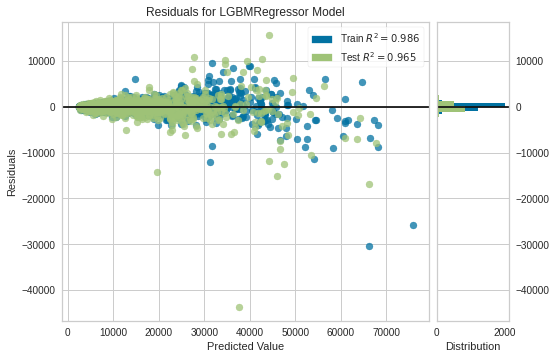

In [20]:
#residual plot
plot_model(tuned_lightgbm)

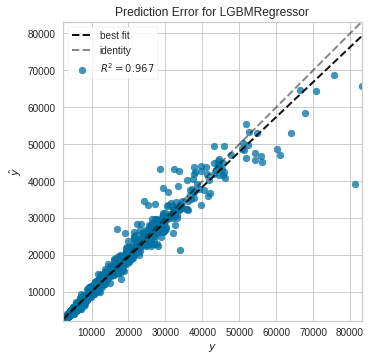

In [21]:
#prediction error plot
plot_model(lightgbm, plot='error')

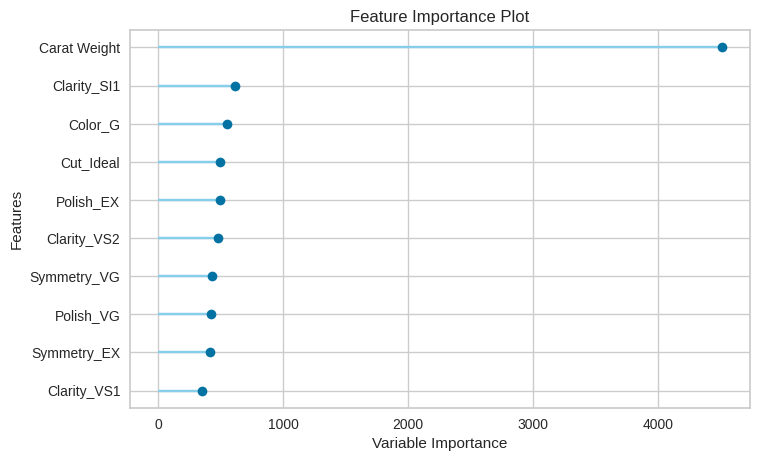

In [22]:
#feature importance
plot_model(tuned_lightgbm,plot='feature')

In [23]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

Prediction on Test

In [25]:
predict_model(tuned_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,781.5572,3.816757e+06,1953.6523,0.9652,0.0787,0.0558


Finalize model

In [26]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [27]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [28]:
predict_model(final_lightgbm);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,459.916,1.199892e+06,1095.3958,0.9891,0.0498,0.0362


Predict on Unseen Data

In [29]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.53,Ideal,E,SI1,ID,ID,AGSL,12791,12262.949782
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,10122.442382
2,1.01,Good,E,SI1,G,G,GIA,5161,5032.520456
3,2.51,Very Good,G,VS2,VG,VG,GIA,34361,34840.379469
4,1.01,Good,I,SI1,VG,VG,GIA,4238,4142.695964


In [30]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779

Saving the model

In [31]:
save_model(final_lightgbm,'Final LightGBM')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  